In [1]:
import numpy as np
import torch
import torch.nn as nn

from lib.evaluate import evaluate_total_predictions_set, display_mazes
from lib.cnnae_fully_convolutional import createLevel3FullyConvDropoutNet as createNet

%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
model, criterion, optimizer = createNet(channels=(15, 84, 167))
model.load_state_dict(torch.load("./archive/Level3FullyConvDropoutNet_99.8647/net.pt", weights_only=True))
model.eval()

Level3FullyConvDropoutNet(
  (encoder): Sequential(
    (0): Conv2d(1, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout2d(p=0.2, inplace=False)
    (4): Conv2d(15, 84, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout2d(p=0.2, inplace=False)
    (8): Conv2d(84, 167, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(167, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout2d(p=0.2, inplace=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(167, 84, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ConvTranspose2d(84, 15, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(15, ep

In [4]:
path_to_data = "./data/generated/"
Y_test = np.load(f"{path_to_data}20000x7x7_solved.npy")
X_test = np.load(f"{path_to_data}20000x7x7_unsolved.npy")
# X_test = np.expand_dims(X_test, axis=1)
# Y_test = np.expand_dims(Y_test, axis=1)
# X_test_tensor = torch.tensor(X_test[:, np.newaxis], dtype=torch.float32)
# Y_test_tensor = torch.tensor(Y_test[:, np.newaxis], dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

In [5]:
X_test_tensor.shape

torch.Size([20000, 1, 7, 7])

In [6]:
model = model.to("cpu")
y_hat = model(X_test_tensor)
from torchsummary import summary
summary(model.to(device), (1, 7, 7), X_test_tensor.shape[0])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [20000, 15, 7, 7]             150
              ReLU-2          [20000, 15, 7, 7]               0
       BatchNorm2d-3          [20000, 15, 7, 7]              30
         Dropout2d-4          [20000, 15, 7, 7]               0
            Conv2d-5          [20000, 84, 5, 5]          11,424
              ReLU-6          [20000, 84, 5, 5]               0
       BatchNorm2d-7          [20000, 84, 5, 5]             168
         Dropout2d-8          [20000, 84, 5, 5]               0
            Conv2d-9         [20000, 167, 3, 3]         126,419
             ReLU-10         [20000, 167, 3, 3]               0
      BatchNorm2d-11         [20000, 167, 3, 3]             334
        Dropout2d-12         [20000, 167, 3, 3]               0
  ConvTranspose2d-13          [20000, 84, 5, 5]         126,336
             ReLU-14          [20000, 8

In [7]:
y_hat.shape

torch.Size([20000, 1, 7, 7])

In [8]:
Y_test_tensor.shape

torch.Size([20000, 1, 7, 7])

In [9]:
correct_percentage, preds, wrong_preds = evaluate_total_predictions_set(y_hat, Y_test_tensor)


----------MODEL SUMMARY-----------
TOTAL SET SIZE:  20000
CORRECT GUESSES:  2300
TOTALING TO ACCURACY%:  11.5
------------------------------------




In [10]:
wrong_preds.shape

torch.Size([17700, 7, 7])

In [11]:
wrong_preds_unsqueezed = wrong_preds.unsqueeze(1)

In [12]:
wrong_preds_unsqueezed.shape

torch.Size([17700, 1, 7, 7])

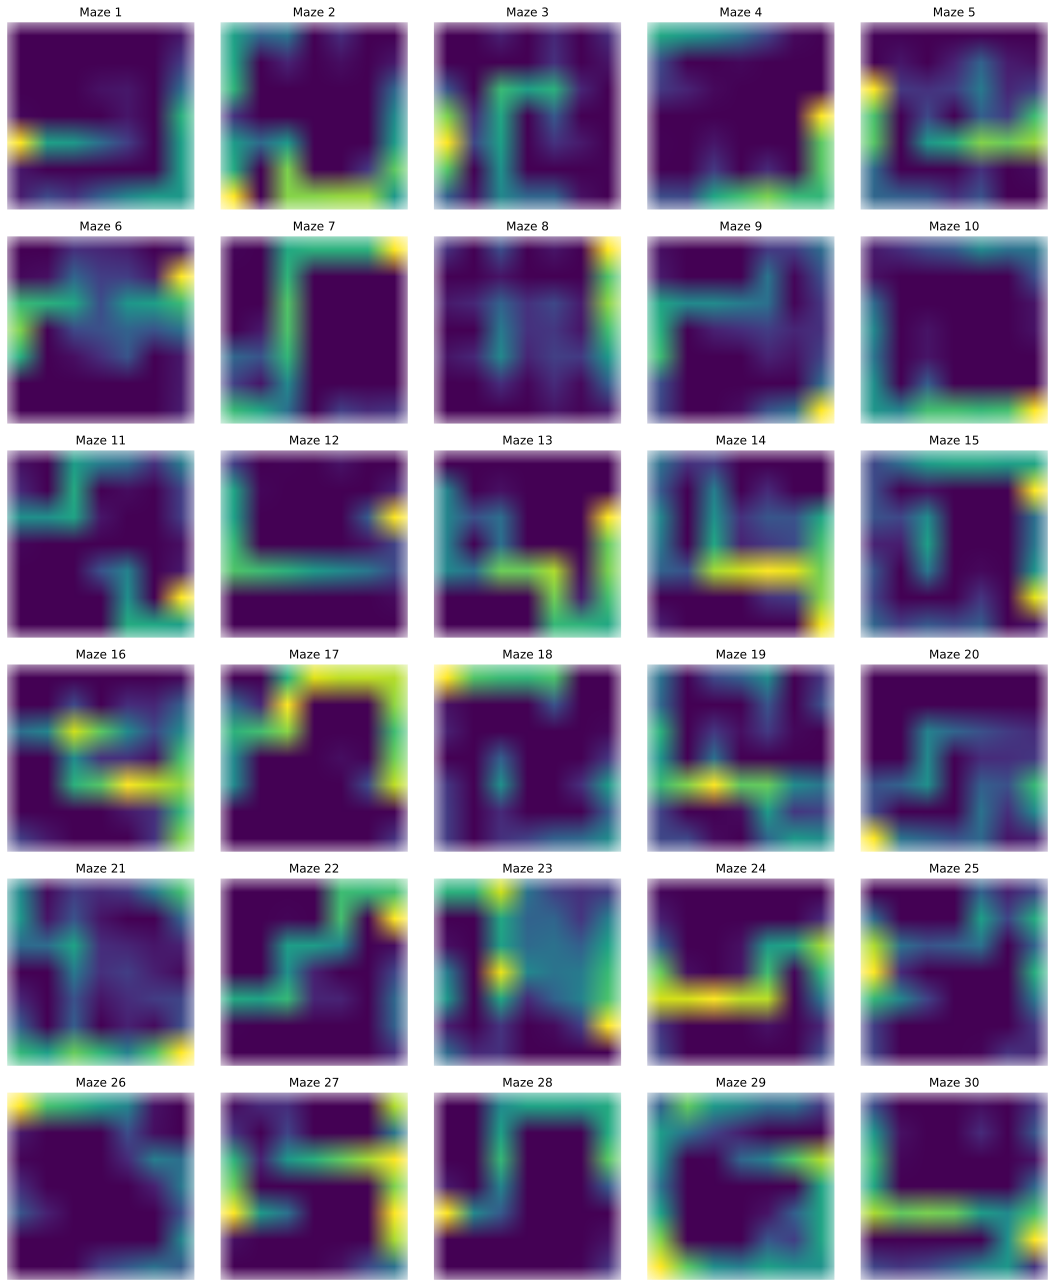

In [13]:
num_samples = wrong_preds.shape[0]
# Example usage with wrong predictions
if wrong_preds_unsqueezed.size(0) > 0:
    display_mazes(wrong_preds_unsqueezed)
else:
    print("No wrong predictions!")